In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
TrainingImagePath='./processed'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
dir_Iterator = datagen.flow_from_directory(
    TrainingImagePath,
    batch_size=32,
    save_format="jpg",
    target_size=(256, 256),
)
for i in range(10):
    img, label = dir_Iterator.next()
    print(img.shape, label)
    plt.imshow(img[0])
    plt.show()

training_set=dir_Iterator

## Load data and divide into train and test sets

In [11]:
# Loading dataset without augmentation
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    TrainingImagePath,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32,
)

testing_set = tf.keras.preprocessing.image_dataset_from_directory(
    TrainingImagePath,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32,
)



Found 16 files belonging to 2 classes.
Using 13 files for training.
Found 16 files belonging to 2 classes.
Using 3 files for validation.


In [13]:
class_names = training_set.class_names
print(class_names)

['khalil', 'others']


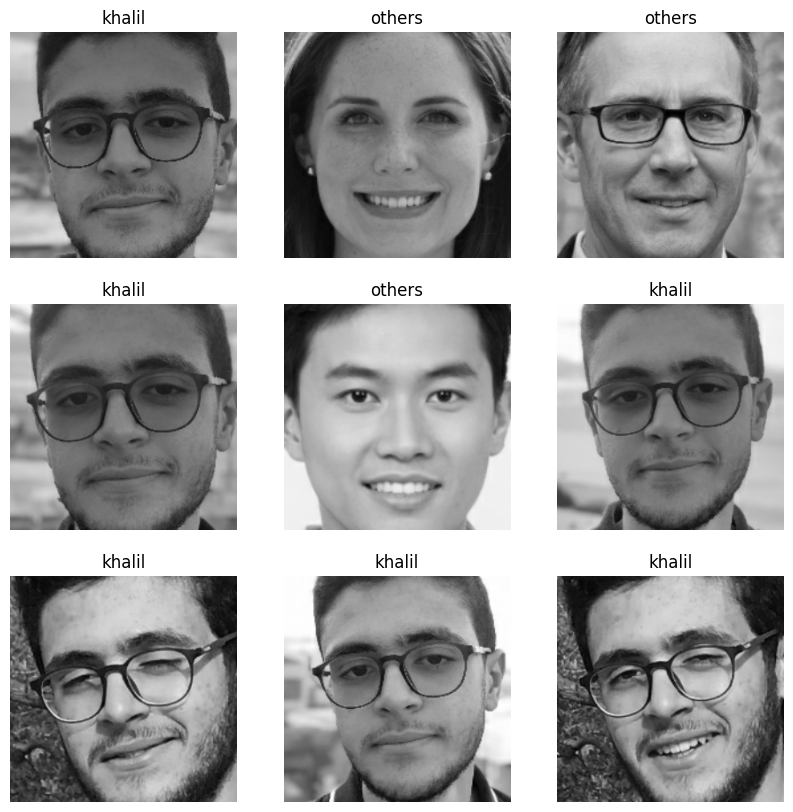

In [14]:
# Visualizing the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
class_names = training_set.class_indices
print(class_names)

{'khalil': 0, 'others': 1}
